<a href="https://colab.research.google.com/github/taniamotha/Stock-Market-Analysis-project-S-P-500/blob/main/w2052145_CRM_CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Task 1

In [22]:
import pandas as pd

wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Add a User-Agent header to mimic a browser request
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

tables = pd.read_html(wiki_url, storage_options=headers)
sp500_table = tables[1]

tickers = sp500_table['Symbol'].tolist()

print(f"Number of tickers extracted: {len(tickers)}")
tickers[:10]

Number of tickers extracted: 502


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [23]:
pip install yfinance yahoo_fin

In [24]:
import yfinance as yf
import yfinance as yf

start_date = "2022-01-01"
end_date   = "2025-01-01"

start = "2022-01-01"
end = "2025-01-01"
data_source = "yahoo"
tickers = [t.replace(".", "-") for t in tickers]
# Download data for all tickers from yfinance
data_yf = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

/tmp/ipython-input-3160350848.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_yf = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
[*********************100%***********************]  502 of 502 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['Q', 'SOLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')


In [25]:
# Create an empty dataframe to hold Close prices
close_prices = pd.DataFrame()

# Extract Close prices for each ticker
for ticker in tickers:
    try:
        close_prices[ticker] = data_yf[ticker]['Close']
    except KeyError:
        print(f"No Close data found for: {ticker}")

# Check the data
print(f"Close Price DataFrame shape: {close_prices.shape}")
close_prices.head()

/tmp/ipython-input-3134886389.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_prices[ticker] = data_yf[ticker]['Close']
/tmp/ipython-input-3134886389.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_prices[ticker] = data_yf[ticker]['Close']
/tmp/ipython-input-3134886389.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmente

Close Price DataFrame shape: (753, 502)


,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,127.527885,77.668465,128.996124,116.779305,383.711884,564.369995,150.240005,20.777493,53.154984,152.320053,...,22.250263,223.977829,263.720001,85.311440,60.062141,111.333672,127.066269,583.900024,121.447723,224.977798
2022-01-04,129.314499,78.960297,125.962372,116.555092,380.969879,554.000000,144.419998,20.837149,54.897324,147.170685,...,22.451775,226.925278,253.059998,85.039291,60.442268,112.514740,127.745712,587.599976,122.679779,216.412460
2022-01-05,128.783524,77.640579,125.396416,117.167358,374.260681,514.429993,136.149994,19.882647,54.806107,144.649567,...,22.502155,225.346939,248.259995,81.890045,61.034580,110.981262,126.126320,558.179993,122.275375,208.183548
2022-01-06,127.714470,78.161034,125.377892,116.615456,356.187500,514.119995,136.229996,19.805944,55.818665,145.155746,...,23.039516,222.808350,250.630005,82.269127,60.557213,110.828873,127.429253,555.159973,121.259628,209.010300
2022-01-07,129.113602,77.278130,125.767509,116.313629,349.355835,510.700012,132.000000,19.686630,56.703510,141.291275,...,23.518106,220.165146,250.240005,82.181648,61.087624,109.943077,125.968071,530.859985,120.526031,202.925125


In [26]:

clean_data = {}

for ticker in tickers:
    # Get the DataFrame for the current ticker
    df = data_yf[ticker]

    # Check if 'Open' and 'Close' columns exist
    if 'Open' in df.columns and 'Close' in df.columns:
        # Remove rows with invalid prices (0 or NaN)
        df_cleaned = df[(df['Open'] > 0) & (df['Close'] > 0)].dropna(subset=['Open', 'Close'])

        # Add to clean_data if not empty
        if not df_cleaned.empty:
            clean_data[ticker] = df_cleaned
    else:
        print(f"Skipping {ticker}: 'Open' or 'Close' column not found.")

print(f"Number of tickers with cleaned data: {len(clean_data)}")

Number of tickers with cleaned data: 500


In [28]:
close_prices = pd.DataFrame()

for ticker, df in clean_data.items():


    if "Close" in df.columns:
        series = df["Close"].dropna()
    else:
        print(f"No Close column found for {ticker}")
        continue

    # Add cleaned series to DataFrame
    if len(series) > 0:
        close_prices[ticker] = series
    else:
        print(f"Close data empty after cleaning for {ticker}")

print("Close prices DataFrame shape:", close_prices.shape)
close_prices.head()

/tmp/ipython-input-908479494.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_prices[ticker] = series
/tmp/ipython-input-908479494.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_prices[ticker] = series
/tmp/ipython-input-908479494.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy(

Close prices DataFrame shape: (753, 500)


/tmp/ipython-input-908479494.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_prices[ticker] = series
/tmp/ipython-input-908479494.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_prices[ticker] = series
/tmp/ipython-input-908479494.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy(

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,127.527885,77.668465,128.996124,116.779305,383.711884,564.369995,150.240005,20.777493,53.154984,152.320053,...,22.250263,223.977829,263.720001,85.311440,60.062141,111.333672,127.066269,583.900024,121.447723,224.977798
2022-01-04,129.314499,78.960297,125.962372,116.555092,380.969879,554.000000,144.419998,20.837149,54.897324,147.170685,...,22.451775,226.925278,253.059998,85.039291,60.442268,112.514740,127.745712,587.599976,122.679779,216.412460
2022-01-05,128.783524,77.640579,125.396416,117.167358,374.260681,514.429993,136.149994,19.882647,54.806107,144.649567,...,22.502155,225.346939,248.259995,81.890045,61.034580,110.981262,126.126320,558.179993,122.275375,208.183548
2022-01-06,127.714470,78.161034,125.377892,116.615456,356.187500,514.119995,136.229996,19.805944,55.818665,145.155746,...,23.039516,222.808350,250.630005,82.269127,60.557213,110.828873,127.429253,555.159973,121.259628,209.010300
2022-01-07,129.113602,77.278130,125.767509,116.313629,349.355835,510.700012,132.000000,19.686630,56.703510,141.291275,...,23.518106,220.165146,250.240005,82.181648,61.087624,109.943077,125.968071,530.859985,120.526031,202.925125


In [29]:
print(close_prices.shape)
print(close_prices.head())

(753, 500)
                   MMM        AOS         ABT        ABBV         ACN  \
Date                                                                    
2022-01-03  127.527885  77.668465  128.996124  116.779305  383.711884   
2022-01-04  129.314499  78.960297  125.962372  116.555092  380.969879   
2022-01-05  128.783524  77.640579  125.396416  117.167358  374.260681   
2022-01-06  127.714470  78.161034  125.377892  116.615456  356.187500   
2022-01-07  129.113602  77.278130  125.767509  116.313629  349.355835   

                  ADBE         AMD        AES        AFL           A  ...  \
Date                                                                  ...   
2022-01-03  564.369995  150.240005  20.777493  53.154984  152.320053  ...   
2022-01-04  554.000000  144.419998  20.837149  54.897324  147.170685  ...   
2022-01-05  514.429993  136.149994  19.882647  54.806107  144.649567  ...   
2022-01-06  514.119995  136.229996  19.805944  55.818665  145.155746  ...   
2022-01-07  510

In [30]:
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APP', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK-B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'XYZ', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CPT', 'CPB', 'COF', 'CAH', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'COIN', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DDOG', 'DVA', '

In [31]:
sample_tickers = close_prices.sample(n=10, axis=1).columns
sample_tickers

Index(['TEL', 'WTW', 'OMC', 'ADM', 'MCHP', 'TSCO', 'KHC', 'GS', 'KEYS', 'ITW'], dtype='object')

<Figure size 2000x1500 with 0 Axes>

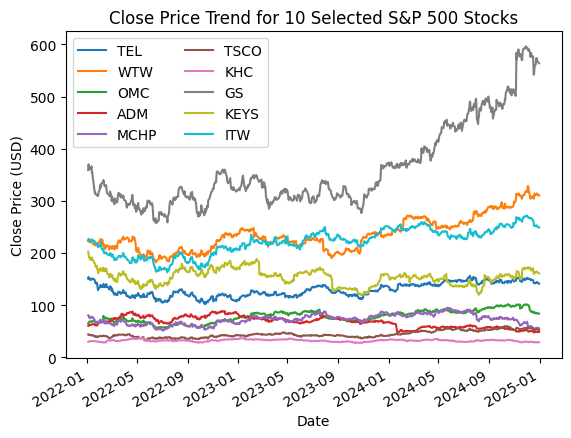

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
close_prices[sample_tickers].plot()
plt.title("Close Price Trend for 10 Selected S&P 500 Stocks")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend(sample_tickers, ncol=2)
plt.show()

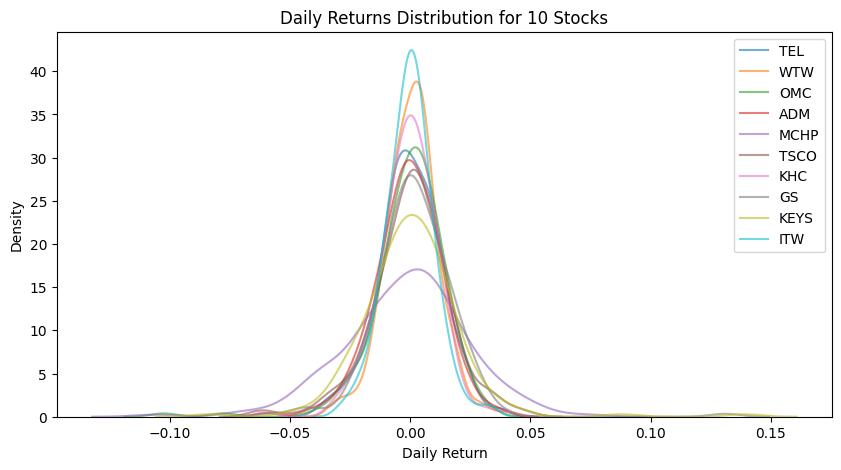

In [33]:
import seaborn as sns

returns = close_prices.pct_change().dropna()

plt.figure(figsize=(10, 5))
for ticker in sample_tickers:
    sns.kdeplot(returns[ticker], label=ticker, alpha=0.6)

plt.title("Daily Returns Distribution for 10 Stocks")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.show()

In [34]:
close_prices

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,127.527885,77.668465,128.996124,116.779305,383.711884,564.369995,150.240005,20.777493,53.154984,152.320053,...,22.250263,223.977829,263.720001,85.311440,60.062141,111.333672,127.066269,583.900024,121.447723,224.977798
2022-01-04,129.314499,78.960297,125.962372,116.555092,380.969879,554.000000,144.419998,20.837149,54.897324,147.170685,...,22.451775,226.925278,253.059998,85.039291,60.442268,112.514740,127.745712,587.599976,122.679779,216.412460
2022-01-05,128.783524,77.640579,125.396416,117.167358,374.260681,514.429993,136.149994,19.882647,54.806107,144.649567,...,22.502155,225.346939,248.259995,81.890045,61.034580,110.981262,126.126320,558.179993,122.275375,208.183548
2022-01-06,127.714470,78.161034,125.377892,116.615456,356.187500,514.119995,136.229996,19.805944,55.818665,145.155746,...,23.039516,222.808350,250.630005,82.269127,60.557213,110.828873,127.429253,555.159973,121.259628,209.010300
2022-01-07,129.113602,77.278130,125.767509,116.313629,349.355835,510.700012,132.000000,19.686630,56.703510,141.291275,...,23.518106,220.165146,250.240005,82.181648,61.087624,109.943077,125.968071,530.859985,120.526031,202.925125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,127.944412,67.500648,112.625923,173.918808,356.539642,447.940002,126.290001,12.266630,101.020866,135.004913,...,53.211460,312.490265,269.040009,87.924858,66.017303,116.754807,133.063248,395.440002,106.293633,162.540009
2024-12-26,128.749207,67.500648,113.126442,173.145844,355.356506,450.160004,125.059998,12.097046,101.431847,134.737106,...,52.587738,314.309692,269.380005,88.449753,65.988266,117.071030,134.048904,396.850006,106.244102,163.349243
2024-12-27,127.767738,67.049927,112.851639,171.996048,351.166351,446.480011,125.190002,12.012254,101.157860,134.449417,...,52.568245,312.767151,266.239990,87.825821,65.949554,116.142128,133.289932,389.070007,105.867668,162.441315


In [35]:
#Task 2

In [40]:
#2.1

import pandas as pd

# Combine only Adj Close into one frame
adj_close_df = pd.DataFrame({
    t: clean_data[t]['Close'] for t in clean_data
})

# Sort index
adj_close_df = adj_close_df.sort_index()

adj_close_df.head()

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,127.527885,77.668465,128.996124,116.779305,383.711884,564.369995,150.240005,20.777493,53.154984,152.320053,...,22.250263,223.977829,263.720001,85.311440,60.062141,111.333672,127.066269,583.900024,121.447723,224.977798
2022-01-04,129.314499,78.960297,125.962372,116.555092,380.969879,554.000000,144.419998,20.837149,54.897324,147.170685,...,22.451775,226.925278,253.059998,85.039291,60.442268,112.514740,127.745712,587.599976,122.679779,216.412460
2022-01-05,128.783524,77.640579,125.396416,117.167358,374.260681,514.429993,136.149994,19.882647,54.806107,144.649567,...,22.502155,225.346939,248.259995,81.890045,61.034580,110.981262,126.126320,558.179993,122.275375,208.183548
2022-01-06,127.714470,78.161034,125.377892,116.615456,356.187500,514.119995,136.229996,19.805944,55.818665,145.155746,...,23.039516,222.808350,250.630005,82.269127,60.557213,110.828873,127.429253,555.159973,121.259628,209.010300
2022-01-07,129.113602,77.278130,125.767509,116.313629,349.355835,510.700012,132.000000,19.686630,56.703510,141.291275,...,23.518106,220.165146,250.240005,82.181648,61.087624,109.943077,125.968071,530.859985,120.526031,202.925125


In [41]:
import yfinance as yf

sp500 = yf.download("^GSPC", start="2022-01-01", end="2025-01-01")['Close']
sp500 = sp500.loc[adj_close_df.index]   # align dates

/tmp/ipython-input-1972990045.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2022-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  1 of 1 completed


In [63]:
# DAILY RETURN
daily_returns = close_prices.pct_change()  # formula as (P_t - P_(t-1)) / P_(t-1)

# Remove first NA row
daily_returns = daily_returns.dropna()

print("Daily Returns Shape:", daily_returns.shape)
daily_returns.head()

Daily Returns Shape: (192, 500)


,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,0.014151,0.006865,0.001586,0.009703,0.016630,0.000397,0.005011,0.039421,0.002803,-0.012621,...,0.011157,-0.003334,-0.003180,0.004323,0.006931,-0.001082,0.009685,0.007621,-0.004751,0.004154
2024-04-01,0.060129,-0.004248,-0.013813,-0.007359,-0.021465,-0.004974,0.015790,0.007808,-0.007804,0.001969,...,-0.002566,-0.005673,-0.001137,0.042355,-0.008744,-0.004642,0.013127,-0.001460,-0.016896,-0.012942
2024-04-02,-0.012550,-0.005950,-0.000624,-0.000387,-0.007990,-0.005736,-0.025308,-0.013835,-0.003052,-0.009549,...,0.011063,-0.020589,-0.002863,-0.012200,0.015015,-0.004042,0.001708,-0.014950,-0.009865,-0.012035
2024-04-03,0.003770,0.001129,-0.006606,-0.018595,-0.012423,-0.004407,0.011584,0.004489,0.002944,-0.003052,...,0.001272,0.005564,-0.010417,0.011020,0.000185,0.005776,-0.012081,-0.012648,0.011987,-0.012363
2024-04-04,-0.028437,-0.017033,-0.010514,-0.053178,-0.005447,-0.019919,-0.082646,0.013408,-0.009627,-0.016628,...,-0.006099,-0.011066,0.000930,-0.002819,-0.005916,-0.012494,-0.019639,0.000717,-0.018845,0.015647


In [45]:
import numpy as np

# Daily volatility (std)
daily_vol = daily_returns.std()

# Annual volatility (professor formula)
annual_volatility = daily_vol * np.sqrt(252)

annual_vol_df = pd.DataFrame({
    "Daily Volatility": daily_vol,
    "Annual Volatility": annual_volatility
})

print(annual_vol_df.head())

      Daily Volatility  Annual Volatility
MMM           0.021192           0.336413
AOS           0.015513           0.246256
ABT           0.011307           0.179501
ABBV          0.016345           0.259462
ACN           0.015059           0.239048


In [47]:
import numpy as np

betas = {}

market_std = sp500_returns.std()

for ticker in daily_returns.columns:
    stock_ret = daily_returns[ticker]

    # Corrected: Access the Series from sp500_returns DataFrame
    corr = stock_ret.corr(sp500_returns.iloc[:, 0])
    stock_std = stock_ret.std()

    # beta is a Series, extract the scalar value
    beta = (corr * (stock_std / market_std)).item()
    betas[ticker] = beta

beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])
beta_df.head(10)

,Beta
MMM,0.548143
AOS,0.514623
ABT,0.099113
ABBV,0.154144
ACN,0.416310
ADBE,0.843778
AMD,1.579898
AES,0.463458
AFL,0.284504
A,0.607604


from matplotlib import pyplot as plt
_df_0['Beta'].plot(kind='hist', bins=20, title='Beta')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Beta'].plot(kind='line', figsize=(8, 4), title='Beta')
plt.gca().spines[['top', 'right']].set_visible(False)

In [48]:
metrics = pd.DataFrame({
    "Mean Daily Return": daily_returns.mean(),
    "Daily Volatility": daily_vol,
    "Annual Volatility": annual_volatility,
    "Beta": beta_df["Beta"]
})

print(metrics.head())

      Mean Daily Return  Daily Volatility  Annual Volatility      Beta
MMM            0.002327          0.021192           0.336413  0.548143
AOS           -0.001192          0.015513           0.246256  0.514623
ABT            0.000124          0.011307           0.179501  0.099113
ABBV           0.000197          0.016345           0.259462  0.154144
ACN            0.000339          0.015059           0.239048  0.416310


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(beta_df[['Beta']])

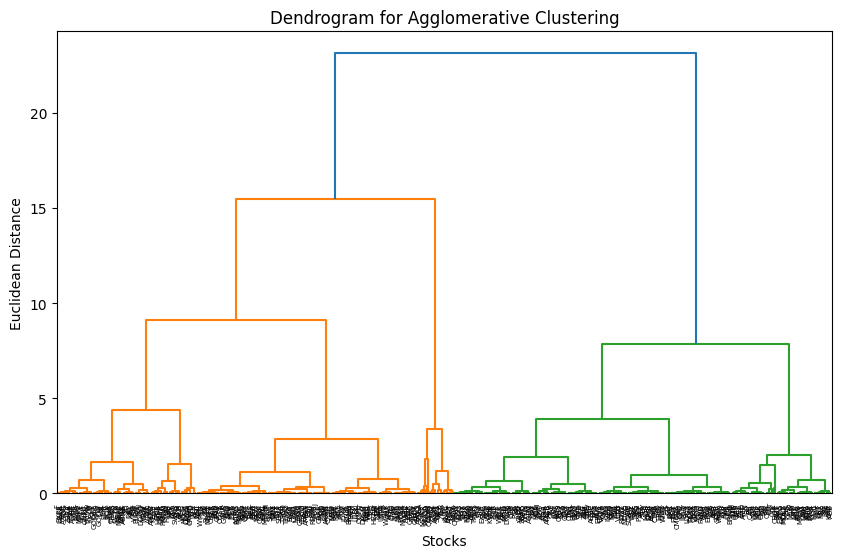

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked, labels=beta_df.index.values, orientation='top', distance_sort='descending')
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Stocks')
plt.ylabel('Euclidean Distance')
plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    clusterer = AgglomerativeClustering(n_clusters=k)
    labels = clusterer.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k} -> Silhouette Score = {score:.3f}")

K=2 -> Silhouette Score = 0.495
K=3 -> Silhouette Score = 0.532
K=4 -> Silhouette Score = 0.475
K=5 -> Silhouette Score = 0.515
K=6 -> Silhouette Score = 0.510
K=7 -> Silhouette Score = 0.497
K=8 -> Silhouette Score = 0.502
K=9 -> Silhouette Score = 0.538


In [53]:
optimal_k = 3
agg = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
beta_df['Cluster'] = agg.fit_predict(X_scaled)

beta_df.head(10)

,Beta,Cluster
MMM,0.548143,0
AOS,0.514623,1
ABT,0.099113,1
ABBV,0.154144,1
ACN,0.416310,1
ADBE,0.843778,0
AMD,1.579898,2
AES,0.463458,1
AFL,0.284504,1
A,0.607604,0


from matplotlib import pyplot as plt
_df_2['Beta'].plot(kind='hist', bins=20, title='Beta')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Beta', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Beta'].plot(kind='line', figsize=(8, 4), title='Beta')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

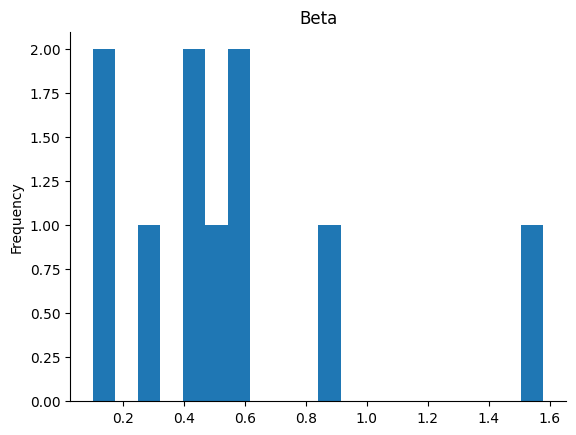

In [64]:
from matplotlib import pyplot as plt
_df_2['Beta'].plot(kind='hist', bins=20, title='Beta')
plt.gca().spines[['top', 'right',]].set_visible(False)

Cluster
0    0.790482
1    0.267013
2    1.778577
Name: Beta, dtype: float64


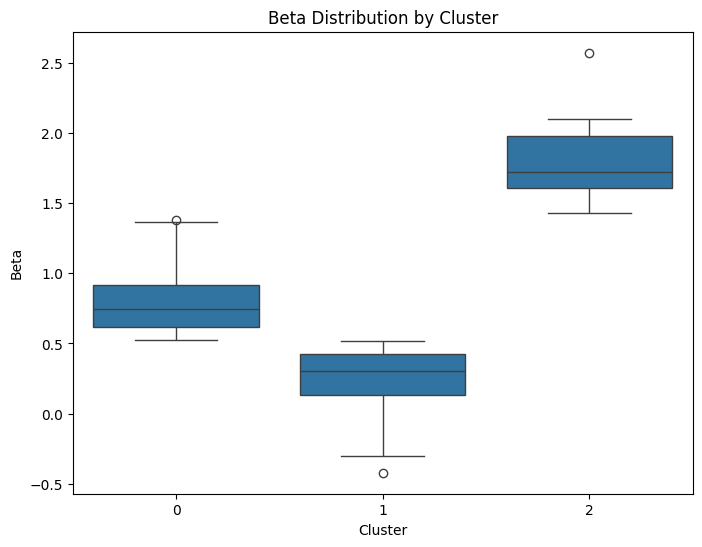

In [54]:
# Cluster mean Beta
cluster_profile = beta_df.groupby('Cluster')['Beta'].mean()
print(cluster_profile)

# Boxplot visualization
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(x='Cluster', y='Beta', data=beta_df)
plt.title('Beta Distribution by Cluster')
plt.show()

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [56]:
features = ['Beta', 'Annual Volatility']
X = metrics[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

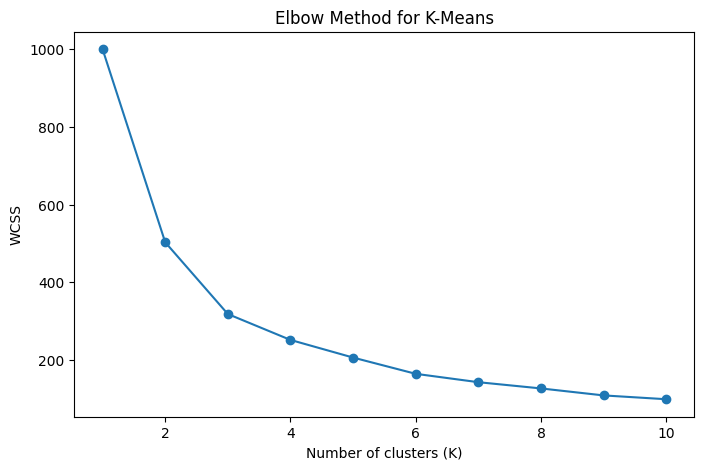

In [57]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [58]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k} -> Silhouette Score = {score:.3f}")


K=2 -> Silhouette Score = 0.524
K=3 -> Silhouette Score = 0.436
K=4 -> Silhouette Score = 0.374
K=5 -> Silhouette Score = 0.390
K=6 -> Silhouette Score = 0.387
K=7 -> Silhouette Score = 0.388
K=8 -> Silhouette Score = 0.376
K=9 -> Silhouette Score = 0.347
K=10 -> Silhouette Score = 0.333


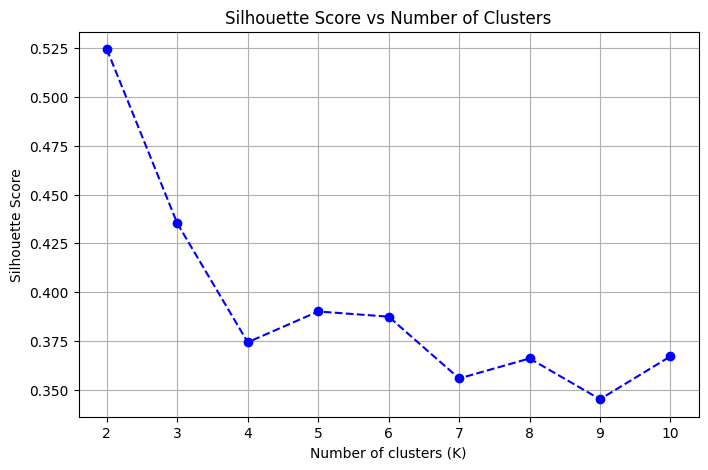

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = []
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress warning
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    k_values.append(k)
    sil_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8,5))
plt.plot(k_values, sil_scores, marker='o', linestyle='--', color='b')
plt.xticks(k_values)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

In [60]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
metrics['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

metrics.head()

,Mean Daily Return,Daily Volatility,Annual Volatility,Beta,KMeans_Cluster
MMM,0.002327,0.021192,0.336413,0.548143,2
AOS,-0.001192,0.015513,0.246256,0.514623,0
ABT,0.000124,0.011307,0.179501,0.099113,0
ABBV,0.000197,0.016345,0.259462,0.154144,0
ACN,0.000339,0.015059,0.239048,0.416310,0


                    Beta  Annual Volatility
KMeans_Cluster                             
0               0.307185           0.211186
1               1.512820           0.540400
2               0.764844           0.319082


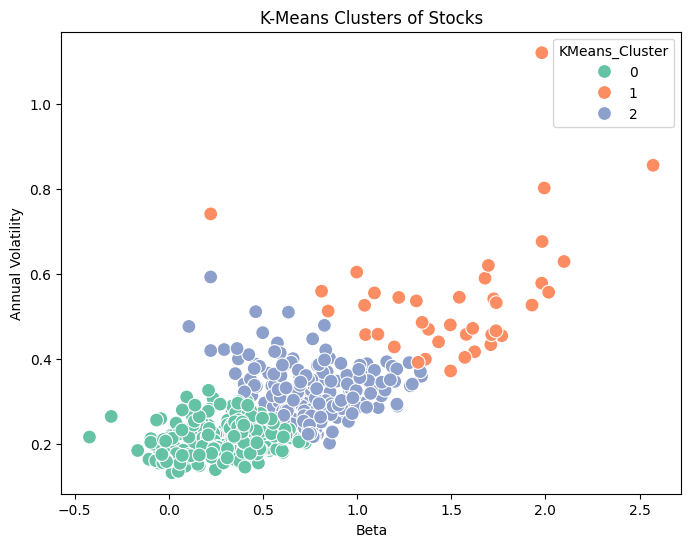

In [61]:
# Cluster
cluster_profile = metrics.groupby('KMeans_Cluster')[features].mean()
print(cluster_profile)


plt.figure(figsize=(8,6))
sns.scatterplot(x='Beta', y='Annual Volatility', hue='KMeans_Cluster', data=metrics, palette='Set2', s=100)
plt.title('K-Means Clusters of Stocks')
plt.show()

In [67]:
# Select the features used in clustering
features = ['Beta', 'Annual Volatility']

# Calculate centroid (mean) of each cluster
centroids = metrics.groupby('KMeans_Cluster')[features].mean()

print(centroids)


                    Beta  Annual Volatility
KMeans_Cluster                             
0               0.307185           0.211186
1               1.512820           0.540400
2               0.764844           0.319082


In [68]:
centroids_with_counts = metrics.groupby('KMeans_Cluster')[features].mean()
centroids_with_counts['Count'] = metrics['KMeans_Cluster'].value_counts()
print(centroids_with_counts)

                    Beta  Annual Volatility  Count
KMeans_Cluster                                    
0               0.307185           0.211186    263
1               1.512820           0.540400     39
2               0.764844           0.319082    198


# Task
Merge `annual_vol_df` with `beta_df` on the index to create a DataFrame containing both Annual Volatility and the risk categories (clusters from Agglomerative Clustering), then generate a boxplot to visualize the distribution of 'Annual Volatility' for each risk category.

## Merge Data

### Subtask:
Merge the 'metrics' DataFrame (containing annual volatility) with 'beta_df' (containing the risk categories from clustering) to create a single DataFrame with both pieces of information.


**Reasoning**:
To merge the two DataFrames, 'metrics' and 'beta_df', I will use the pandas 'merge' function based on their indices, which is a common way to combine dataframes with aligned indices.



In [65]:
merged_df = pd.merge(metrics, beta_df, left_index=True, right_index=True)
print(merged_df.head())

      Mean Daily Return  Daily Volatility  Annual Volatility    Beta_x  \
MMM            0.002327          0.021192           0.336413  0.548143   
AOS           -0.001192          0.015513           0.246256  0.514623   
ABT            0.000124          0.011307           0.179501  0.099113   
ABBV           0.000197          0.016345           0.259462  0.154144   
ACN            0.000339          0.015059           0.239048  0.416310   

      KMeans_Cluster    Beta_y  Cluster  
MMM                2  0.548143        0  
AOS                0  0.514623        1  
ABT                0  0.099113        1  
ABBV               0  0.154144        1  
ACN                0  0.416310        1  


**Reasoning**:
Now that the DataFrames are merged, I will generate a boxplot to visualize the distribution of 'Annual Volatility' across the different clusters created by Agglomerative Clustering. This will help understand the risk profiles of each cluster.



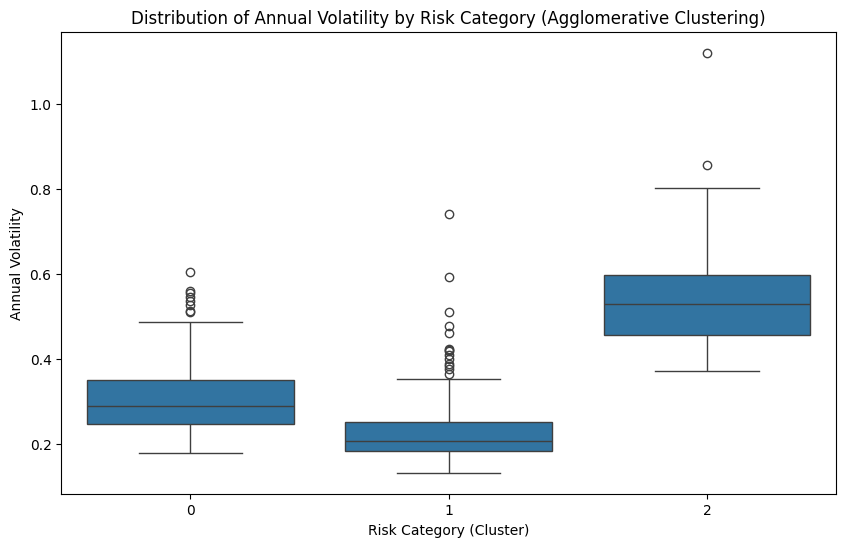

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Volatility', data=merged_df)
plt.title('Distribution of Annual Volatility by Risk Category (Agglomerative Clustering)')
plt.xlabel('Risk Category (Cluster)')
plt.ylabel('Annual Volatility')
plt.show()

## Summary:

### Data Analysis Key Findings
*   The `metrics` DataFrame (containing 'Annual Volatility') was successfully merged with the `beta_df` DataFrame (containing 'Cluster' information for risk categories) by aligning their indices.
*   A boxplot was generated to visualize the distribution of 'Annual Volatility' across different risk categories (clusters from Agglomerative Clustering), which provides a visual representation of risk profiles.

### Insights or Next Steps
*   Analyzing the generated boxplot would allow for a direct comparison of the spread and central tendency of annual volatility within each identified risk category, revealing which categories exhibit higher or lower volatility.
*   The clusters can be further characterized by other financial metrics or company attributes to understand the drivers behind their differing volatility profiles.
